## Compute Sagnac Frequency - Prism Spectra

## Imports

In [1]:
import os
import matplotlib.pyplot as plt

from datetime import datetime, date
from pandas import DataFrame, read_pickle, date_range, concat, read_csv
from obspy import UTCDateTime
from numpy import log10

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

In [3]:
## read sagnac data
sag = read_pickle("/import/kilauea-data/sagnac_frequency/autodata/FJZ_20230606.pkl")

## read mlti log
mlti = read_csv(archive_path+"romy_archive/2023/BW/CROMY/2023_romy_01_mlti.log", names=["datetime", "action"])

In [4]:
from pandas import to_datetime, Timedelta

date = "2023-06-06 00:00"
dt_date = to_datetime(date)
utc_date = UTCDateTime(date)

## add row with datetimes
mlti['dt'] = to_datetime(mlti.index)

## filter for current date
mlti = mlti[(mlti.dt > date) & (mlti.dt < dt_date + Timedelta(days=1))]

mlti['seconds'] = [abs(utc_date - UTCDateTime(t)) for t in mlti.dt]

mlti['mjd'] = mlti['seconds']/86400 + sag.times_mjd.iloc[0]

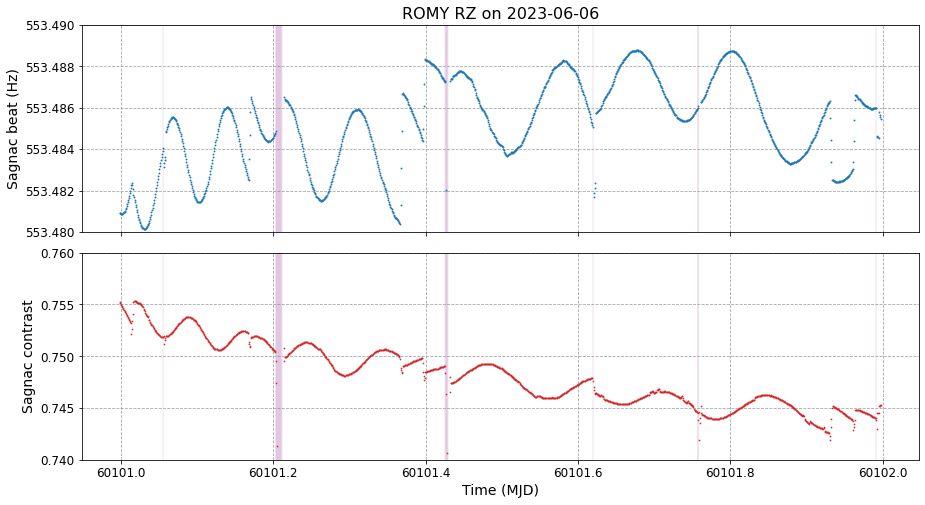

In [6]:
fig, ax = plt.subplots(2,1, figsize=(15,8), sharex=True)

font = 14

plt.subplots_adjust(hspace=0.1)

ax[0].scatter(sag.times_mjd, sag.fz, s=0.8, zorder=2, color="tab:blue")
# ax[0].plot(sag.times_mjd, sag.fz, zorder=1, alpha=0.8, color="black")

ax[1].scatter(sag.times_mjd, sag.contrast_z, s=0.5, zorder=2, color="tab:red")
# ax[1].plot(sag.times_mjd, sag.contrast_z, zorder=1, alpha=0.8, color="black")

for s in mlti.mjd:
    ax[0].axvline(s, -1, 1, color="purple", zorder=1, alpha=0.4, lw=0.3)
    ax[1].axvline(s, -1, 1, color="purple", zorder=1, alpha=0.4, lw=0.3)

    
ax[0].set_ylim(553.48, 553.49)
ax[1].set_ylim(0.74 ,0.76)

ax[0].set_title("ROMY RZ on 2023-06-06", fontsize=font+2)
ax[0].set_ylabel("Sagnac beat (Hz)", fontsize=font)
ax[1].set_ylabel("Sagnac contrast", fontsize=font)
ax[1].set_xlabel("Time (MJD)", fontsize=font)

for j in range(2):
    ax[j].tick_params(labelsize=font-2)   
    ax[j].ticklabel_format(useOffset=False, style='plain')
    ax[j].grid(ls="--", zorder=0, color="grey", alpha=0.7)
    
plt.show();